Dimensionality Reduction

In [2]:
#The curse of Dimensionality

In [3]:
#main approaches for Dimensionality reduction

In [4]:
"""Before we dive into specific dimensionality reduction algorithms, lets take a look at the two main approaches to reducting dimesionality ie projection and Manifold Learning"""

'Before we dive into specific dimensionality reduction algorithms, lets take a look at the two main approaches to reducting dimesionality ie projection and Manifold Learning'

In [5]:
#Projection


#----- In most real world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within a much lower-dimensional subspace of the high dimensional space. This sounds very abstract so lets look at an example. 

![Alt text](Screenshot%20from%202022-11-21%2014-00-22.png)

In [6]:
#The fig 8-2 is a 3d dataset ie lower dimesional dataset. If we project every training instance perpendicularly into this subspace,we get the new 2d dataset shown in the next figure, in which we reduced the datasets dimensionality from 3d to 2d. 

![Alt text](Screenshot%20from%202022-11-21%2014-03-26.png)

In [7]:
#We have just reduced the dimension of the 3d dataset to the 2d dataset, however reducing from the higher dimensions will quite be cumbersome.

PCA

In [1]:
#principal Components

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100,noise=10)

In [9]:
import numpy as np
X_centered = X - X.mean(axis=0)
U,s,Vt = np.linalg.svd(X_centered)

In [13]:
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [14]:
c1

array([-0.89525477,  0.4455546 ])

Projecting Down to d Dimensions

$X$<sub>d-proj</sub> = $XW$<sub>d</sub>

In [21]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

Using Sklearn

In [28]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [29]:
#The first principal component is equal to pca.components_.T

Explained Variance Ratio

In [31]:
pca.explained_variance_ratio_

array([0.59819799, 0.40180201])

Choosing the Right Number of Dimensions

In [7]:
#Instead of choosing the number of dimension to reduce down to it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance.
import numpy as np

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [10]:
d

#show that the 2 components contribute to the highest explained variance ratio


2

In [15]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced

PCA for Compression

In [25]:
from sklearn.datasets import fetch_openml

bio = fetch_openml(name='Bioresponse',cache=True)

In [29]:
X,y = bio.data, bio.target

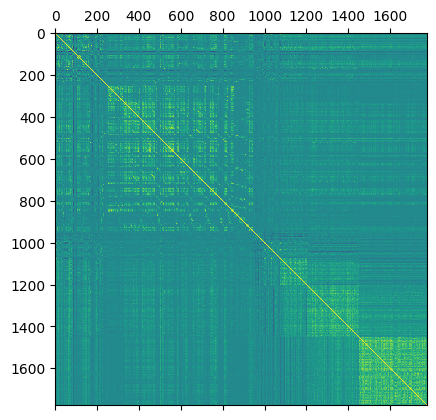

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.matshow(X.corr())

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X,y)

NameError: name 'X' is not defined

In [108]:
X_reduced_df = pd.DataFrame(X_reduced,columns=X.columns[:349])

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
std = StandardScaler()
X_tm = std.fit_transform(X_reduced)

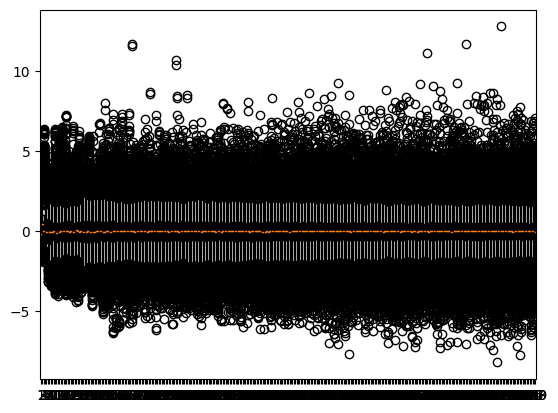

In [111]:
plt.boxplot(X_tm)
plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_tm,y,test_size=0.2, random_state=43)

In [113]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, random_state=42, test_size=0.2)

In [114]:
X_val.shape

(600, 349)

In [155]:
from sklearn.ensemble import RandomForestClassifier
grd_clf = RandomForestClassifier(max_depth=10)
grd_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [157]:
pred = grd_clf.predict(X_val)

confusion_matrix(y_val, pred.astype(int))
f1_score(y_val,pred.astype(int))

0.7708333333333334

In [230]:
from xgboost import XGBRFClassifier
xclf = XGBRFClassifier(learning_rate=0.05,gamma=0.01,max_depth=20,reg_lambda=0.001)

In [243]:
xclf.fit(X_train,y_train.astype(int))
pred = xclf.predict(X_val)
y_val = y_val.astype(int)
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score


In [232]:

confusion_matrix(y_val, pred)
f1_score(y_val,pred)

0.7657657657657657

In [244]:
y_pred = xclf.predict(X_test)

In [245]:
y_test = y_test.astype(int).values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [246]:
f1_score(y_test,y_pred)

0.7797001153402536

In [247]:
accuracy_score(y_test,y_pred)

0.7456724367509987

Inverse Transform
$X$<sub>recovered</sub> = $X$<sub>d-proj</sub>$W$<sub>d</sub><sup>T</sup>

Randomized PCA

In [3]:
#svd_solver = 'randomized'

Incremental PCA

In [6]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=10000,random_state=9789)

In [9]:
from sklearn.decomposition import IncrementalPCA
import numpy as np
n_batches = 100

inc_pca = IncrementalPCA()

for X_batch in np.array_split(X,n_batches):
    inc_pca.partial_fit(X)

In [11]:
X_reduced = inc_pca.transform(X)

In [12]:
X_reduced

array([[-0.51391097, -0.02314291],
       [ 0.3748796 ,  0.24292579],
       [ 1.03421156, -0.37078289],
       ...,
       [ 0.38680757,  0.22832576],
       [-0.32603439,  0.60069188],
       [-1.37066129, -0.18437075]])

In [13]:
#Alternatively one can use the numpys memmap

Kernel PCA

In [15]:
#The default PCA uses linear kernel for dimensionality reduction 
#In order to use other non linear kernels we can use the Kernel PCA

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [18]:
clf = Pipeline([
("kpca", KernelPCA(n_components=2)),
("log_reg", LogisticRegression())
])

In [19]:
param_grid = [{
"kpca__gamma": np.linspace(0.03, 0.05, 10),
"kpca__kernel": ["rbf", "sigmoid"]
}]

In [20]:
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [21]:
print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


K-Means Clustering

In [3]:
#Centroid initialization methods
import numpy as np
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [6]:
#Acceleratd K-Means and mini batch K-means

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

In [8]:
#Also mini-batch Kmeans has a higher intertia than Kmeans but it is much faster especially as k increases

Finding the optimal number of clusters

In [9]:
#A more precise approach is to use the sihouette score, which is the mean silhouette coefficient over all teh instances. An instance's silhouette coefficient is equal to (b-a)/max(a,b) where a is the mean distance to the other instances in the same cluster and b is the mean nearest cluster distance. The silhouette coefficient can vary between -1 and +1 A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that is close to a cluster boundary and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [ ]:
#silhouette score computation 

from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

In [ ]:
#Limits of K-Means



Using Clustering for Image Segmentation

In [15]:
from matplotlib.image import imread
image = imread("/home/susearc/Documents/github/HOML_AurelienG/Screenshot from 2022-11-21 10-23-28.png")
import matplotlib.pyplot as plt

In [11]:
image.shape

(724, 837, 4)

In [27]:
X = image.reshape(-1,4)
X

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [29]:
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

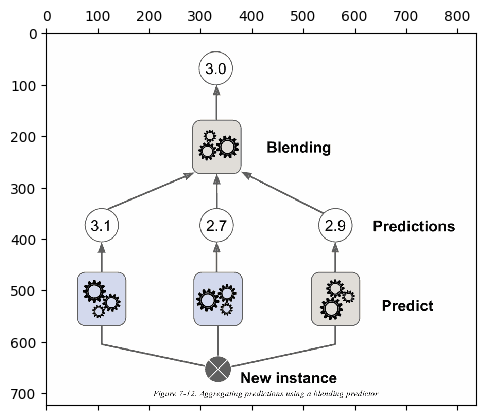

In [31]:
plt.matshow(segmented_img)

Using Clustering for Preprocessing

In [32]:
#Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm.As an example of using clustering for dimensionality reduction, Lets tackle the digits dataset which is a simple mnist like dataset containing 1797 grayscale 8x8 images representing the digits 0 to 9. First, load the dataset


from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [34]:
#Next, fit a Logistic Regression model:


from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/susearc/miniconda3/envs/pylatest/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("kmeans",KMeans(n_clusters=50)),("log_reg",LogisticRegression())])
pipeline.fit(X_train,y_train)

In [36]:
pipeline.score(X_test,y_test)

0.9711111111111111

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [ ]:
grid_clf.best_params_
grid_clf.score(X_test,y_test)

Using Clustering for Semi-Supervised Learning


In [38]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/home/susearc/miniconda3/envs/pylatest/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
log_reg.score(X_test, y_test)

0.8288888888888889

In [40]:
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

In [42]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [45]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [49]:
partially_propagated  = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

NameError: name 'y_train_propagated' is not defined

DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, noise=0.05)
dbscan =DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [9]:
#The indices of the core instances are available in the core_sample_indices_ instance variable and teh core instances themselves are available in the components_ instance variable:


len(dbscan.core_sample_indices_)

807

In [10]:
dbscan.components_

array([[ 0.97989706, -0.48749489],
       [ 1.92666452,  0.27418889],
       [-0.95191524,  0.41738822],
       ...,
       [-0.76728188,  0.70062168],
       [ 0.94044986,  0.41623799],
       [ 0.64638737,  0.73043939]])

In [20]:
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt


In [16]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [17]:
#Now given a few new instances, we can predict which cluster they most likely belong to and even estimate a probability for each cluster:

In [22]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)


array([[0.  , 0.  , 0.64, 0.  , 0.34, 0.  , 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.18, 0.36, 0.02],
       [0.26, 0.  , 0.  , 0.74, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [23]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

In [24]:
y_pred[y_dist>0.2] = -1
y_pred.ravel()

array([-1,  8,  3, -1])

Other Clustering Algorithms

In [27]:
#sklearn implements several more clustering algorithms that you should take a look at. We cannot cover them all in detail here, but here is a brief overview:

#Agglomerative clustering

#BIRCH- Balanced Iterative Reducing and Clustering using Hierarchies

#Mean-Shift

#Affinity propagation

#Spectral clustering

Gaussian Mixtures

In [28]:
#A Gaussian mixture model is a probabilistic model that assumes that the instances were generated form a mixuture of several Gaussian distribution swhose parametsers are unknown. All the instances generated form a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a differrent ellipsoidal shape, size, density and orientation just like in fig. When you observe an instance you know it was generated from one of the Gaussian distributions but you are not told which one and you do not know what the parameters of these distributions are.

Bayesian Faussian Mixture Models

In [29]:
#rather than manually searching for the optimal number of cluster, you can use the BayesianGaussianMixture class which is capable of giving weights equal to zero to unnecessary cluster, Set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of clusters and the algorith will eliminate the unnecessary clusters automatically 

In [30]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/home/susearc/miniconda3/envs/pylatest/lib/python3.11/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


array([0.11, 0.18, 0.13, 0.11, 0.1 , 0.15, 0.13, 0.07, 0.  , 0.  ])

Other Algorithms for Anomaly and Novelty Detection